# Table of Contents
1. Importing Libraries
2. Importing Files
3. Answers of the Exercise 4.9
4. Exporting graphs

## 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Files

In [2]:
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Data Analytics Immersion/Achievement 4/04-04-2024 Instacart Basket Analysis'

In [3]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merge.pkl'))

In [4]:
# Checking header of the dataframe
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range             object  
 14  busiest_day             object  
 15  busiest_days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  avg_price               float64 
 20  spending_flag           object  
 21  median

## 03. Answers of the Exercise 4.9

### Plotting Bar chart

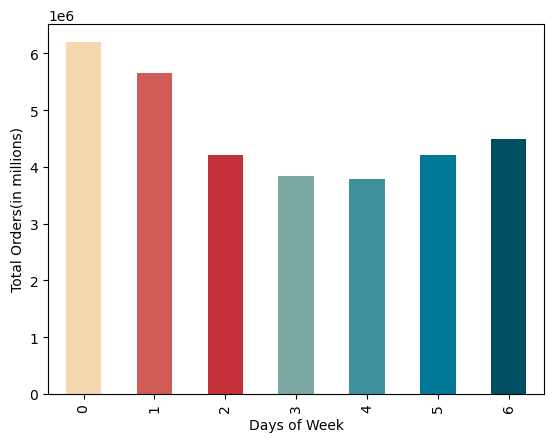

In [6]:
#Bar chart
bar = ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(xlabel = 'Days of Week', ylabel = 'Total Orders(in millions)',
                                                                                color = ['#f5d7b0', '#d15b56', '#c43138', '#7ba8a3', '#3e909d',
                                                                                         '#007896', '#004e61'])

### Plotting Histogram

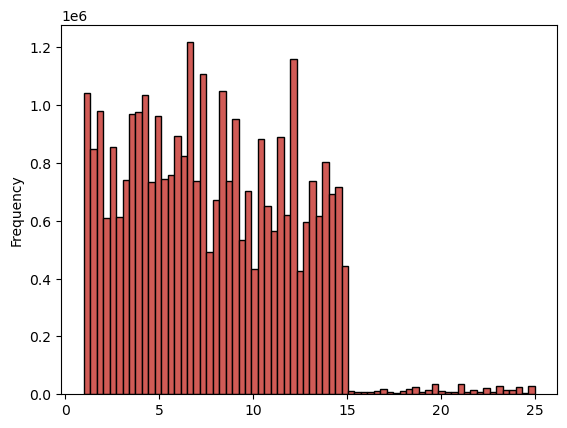

In [5]:
# Plot Histogram
hist = ords_prods_cust['prices'].plot.hist(bins=70, color = '#d15b56', edgecolor='black')

### Plotting Scatter Plot

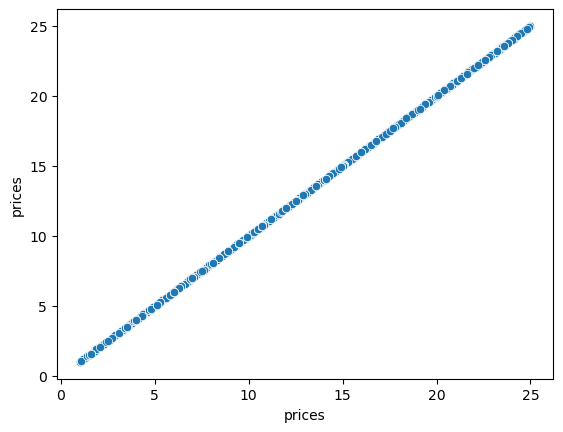

In [51]:
scatter =sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)

Not very useful as it will be a perfect linear relationship.

### Plotting Line Graph

In [14]:
# Creating random values between 0 and 1 for creating samples
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [15]:
# Checking dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
# Store 70% of the sample in the dataframe big
big = ords_prods_cust[dev]

In [17]:
# Store 30% of the sample in the dataframe small
small = ords_prods_cust[~dev]

In [18]:
# Varifying partition
len(big) + len(small)

32404859

In [19]:
# Extracting necessary columns for line graph
df= small[['orders_day_of_week','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


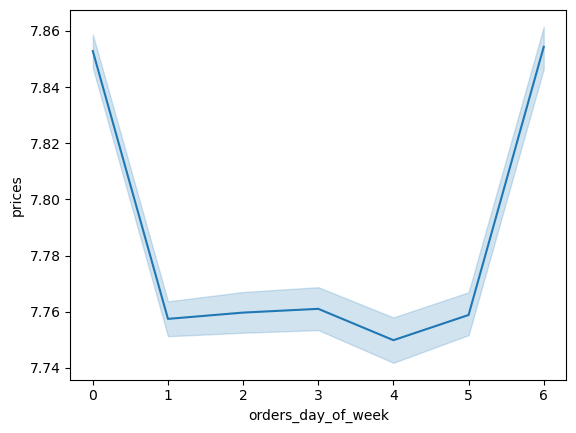

In [21]:
# Creating the line plot
line = sns.lineplot(data = df, x = 'orders_day_of_week',y = 'prices')

### Descriptive findings about sales

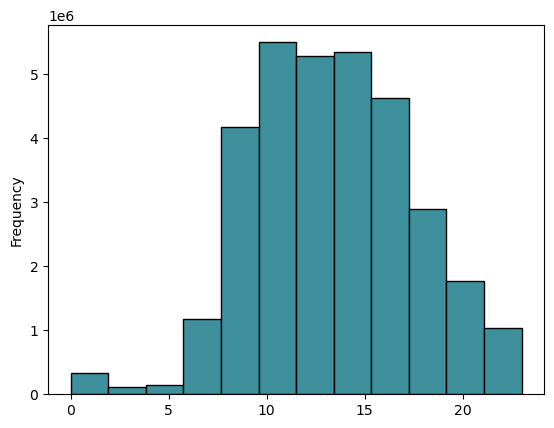

In [6]:
# Ploting order_hour_of_day on a histogram
hist_1 = ords_prods_cust['order_hour_of_day'].plot.hist(bins=12, color = '#3e909d',edgecolor='black')

The histogram demonstrates that the number of hours is maximum berween 10 AM and 12 PM. The maximum frequency during the time period 10 AM to 3 PM. The lowest frequency is at night, between 2 AM and 4 AM. 

### Distribution of Orders in customers in terms of loyalty

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

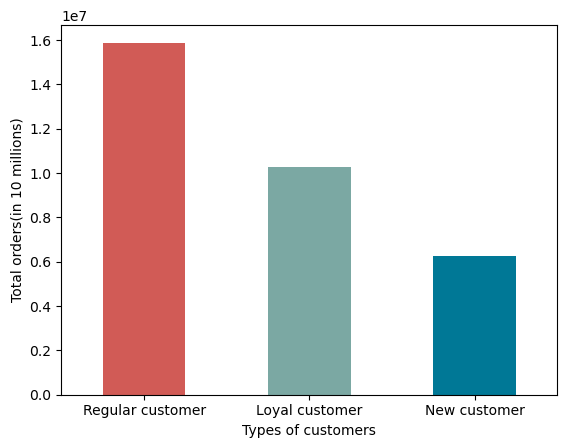

In [16]:
bar_1 = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(xlabel = 'Types of customers', ylabel = 'Total orders(in 10 millions)',
                                                                color = ['#d15b56', '#7ba8a3', '#007896'])
plt.xticks(rotation=0)

Most of the orders are placed by regular customers.

### Difference in expenditure (the “prices” column) depending on the hour of the day 

In [35]:
# Setting Random seed
np.random.seed(5)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [36]:
# Store 70% of the sample in the dataframe big_1
big_1 = ords_prods_cust[dev]

In [37]:
# Store 30% of the sample in the dataframe small_1
small_1 = ords_prods_cust[~dev]

In [39]:
# Creating a dataframe for necessary columns for plotting prices and hour_of_day
df_1 = small_1[['order_hour_of_day', 'prices']]

In [11]:
# Plotting a line graph for prices depending on hour of day
line_1 = sns.lineplot(data = df_1, x = 'order_hour_of_day',y = 'prices')

NameError: name 'df_1' is not defined

### Age and Number of dependants

In [43]:
# Extracting age and number of dependants from our small sample
df_1 = small[['age', 'no_of_dependants']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


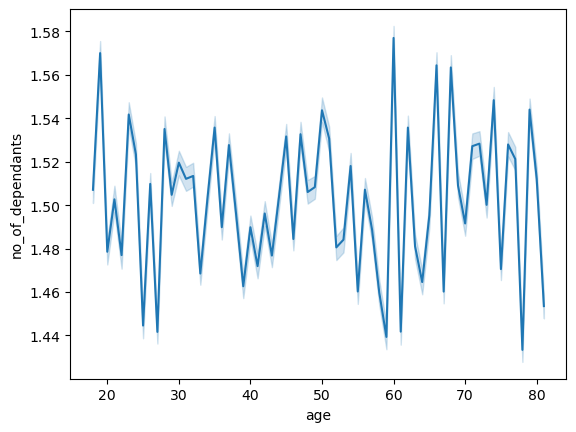

In [44]:
line_2 = sns.lineplot(df_1, x = 'age', y = 'no_of_dependants')

There are a lot of variation on number of dependants as the age increases from left to right on x-axis. There doesn't seem to be a clear relationship between the two variables.

### Checking relationship between age and spending power

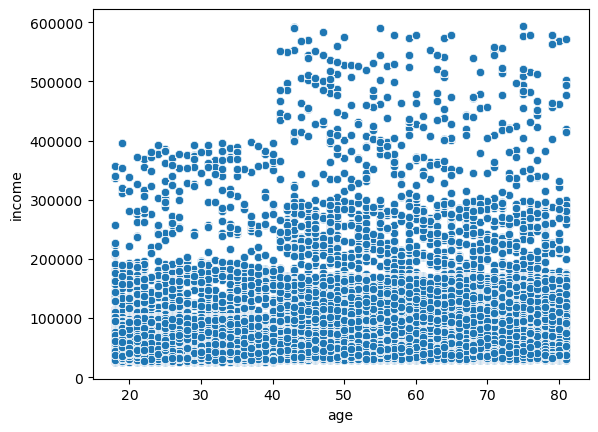

In [47]:
scatter_plot = sns.scatterplot(ords_prods_cust, x = 'age', y = 'income')

There seems to be no clear relationship between age and income. Majority of the people have age below 200,000. And, people having income more than 400,000 have age 40 years or more.

## 04. Exporting graphs

In [7]:
# Exporting bar graph orders day of week
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [8]:
# Exporting price histograph
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram.png'))

In [53]:
# Exporting price and price scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_price_scatter.png'))

In [54]:
# Exporting day_of_week and prices line graph
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_of_week_price_line.png'))

In [7]:
# Exporting hour of day histogram
hist_1.figure.savefig(os.path.join(path,  '04 Analysis', 'Visualizations', 'hour_of_day_histogram.png'))

In [17]:
# Exporting loyalty flag bar graph
bar_1.figure.savefig(os.path.join(path,  '04 Analysis', 'Visualizations', 'loyalty_flag_bar.png'))

In [59]:
# Exporting order hour of day and prices line graph
line_1.figure.savefig(os.path.join(path,  '04 Analysis', 'Visualizations', 'hour_of_day_prices_line.png'))

In [60]:
# Exporting age and number of dependants line graph
line_2.figure.savefig(os.path.join(path,  '04 Analysis', 'Visualizations', 'age_no_dependants_line.png'))

In [61]:
# Exporting age and income scatter plot
scatter_plot.figure.savefig(os.path.join(path,  '04 Analysis', 'Visualizations', 'age_income_scatter.png'))